In [9]:
import math
import numpy as np
import scipy
from scipy import sparse
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import matplotlib.pyplot as plt
from lib_p2 import *

Example 1

In [10]:
T = 300  # simulation time
L = 1   # half length of the box
M = 50  # spacing in L
N = 5000 # spacing in T

# CONSTANTS
KM = 1e3
PC = 3.086e16
MYR = 1e6*365*24*60*60

# Constants and parameters
eta_T = 3.48e-2
Omega = 110*MYR*KM/(1000*PC)
q = 0.98
alpha = 50*1e3*MYR/(100*PC)

#Initial Conditions 1
#'''
def init_cond_Br(z):
	return 1-(z)**2

def init_cond_Bphi(z):
	return np.cos(np.pi*(z)/2)**2
#'''


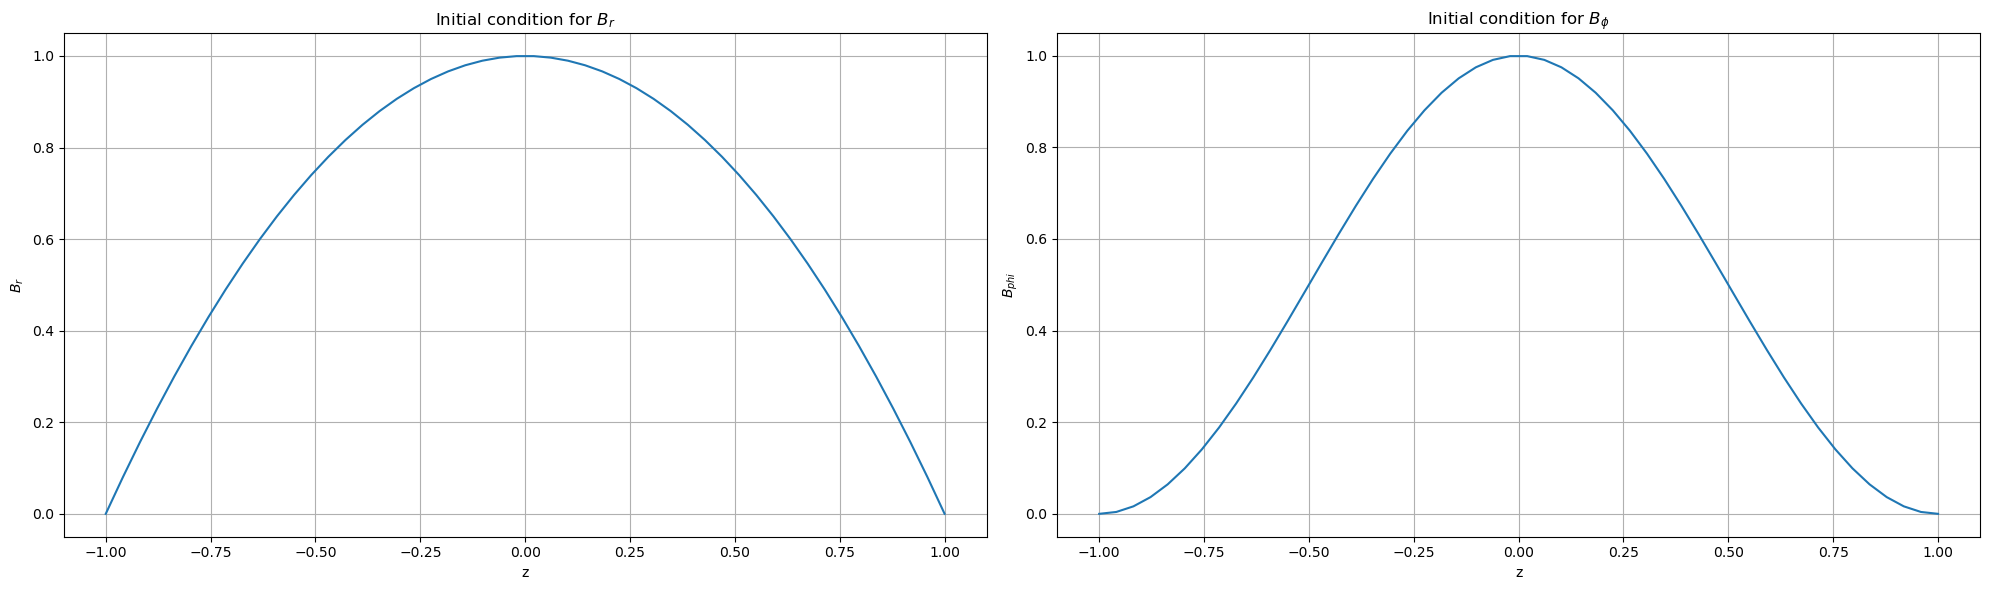

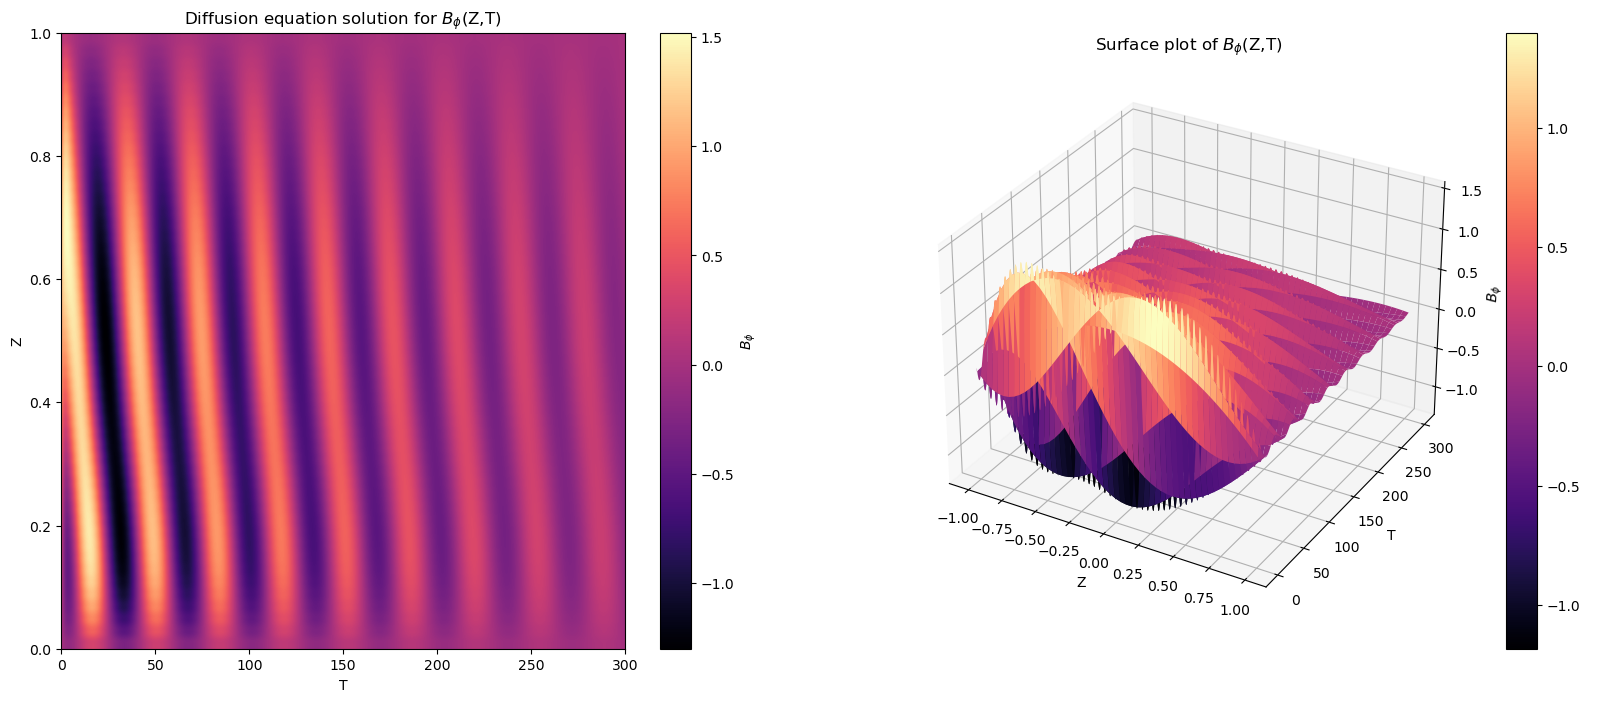

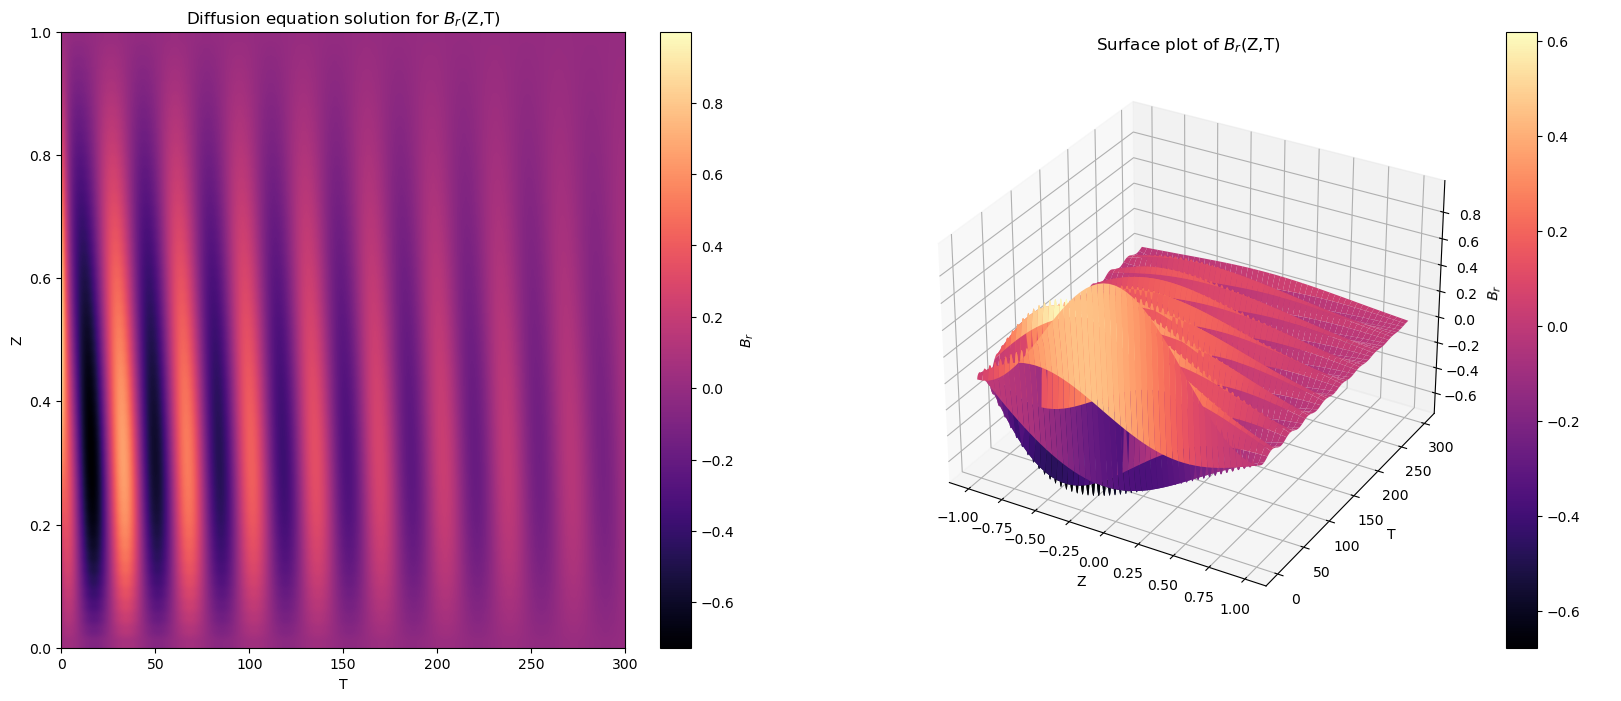

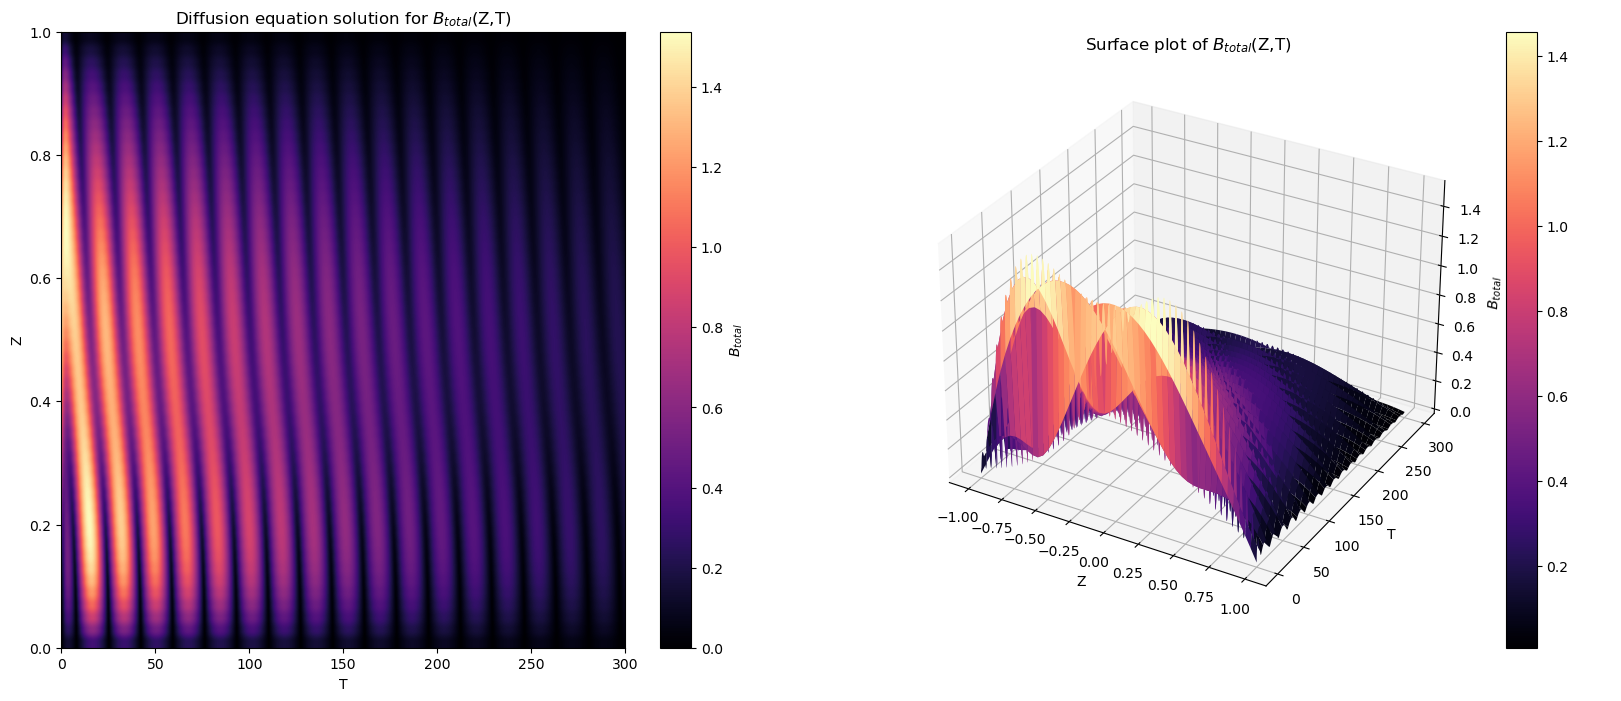

In [11]:
z = np.linspace(-L, L, M)
#print(z)
title_1 = 'Initial condition for $B_{r}$'
title_2 = 'Initial condition for $B_{\phi}$'

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


U, tspan, xspan = crank_nicolson_mod(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B(U_r, tspan, xspan, T, L, '\phi')
plot_B(U_phi, tspan, xspan, T, L, 'r')
#plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','1')
#plot_B_animation(U_r, tspan, xspan, T, L, 'r','1')

B_total = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total, tspan, xspan, T, L, '{total}')
#plot_B_animation(B_total, tspan, xspan, T, L, '{total}','1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


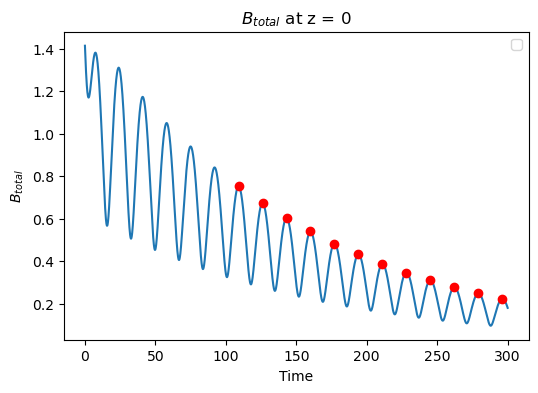

Decay rate: 6.524e-03
Dynamo number  -46.47845120731219


In [12]:
B_mid = B_total[int(M/2),:]

plt.figure(figsize=(6, 4))
plt.plot(tspan, B_mid)
x_max, y_max = find_local_maxima(tspan, B_mid)
plt.plot(x_max, y_max, 'ro')

# Add x and y labels
plt.xlabel('Time')
plt.ylabel('$B_{total}$')
plt.title('$B_{total}$ at z = 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

decay_rate = get_decay_rate(tspan, B_mid)
print('Dynamo number ', -alpha*q*Omega*1**3/eta_T**2)

Example 2

In [13]:
T = 300  # simulation time
L = 1   # half length of the box
M = 50  # spacing in L
N = 5000 # spacing in T

# CONSTANTS
KM = 1e3
PC = 3.086e16
MYR = 1e6*365*24*60*60

# Constants and parameters
eta_T = 3.48e-2
Omega = 110*MYR*KM/(1000*PC)
q = 0.98
alpha = 70*1e3*MYR/(100*PC)

#Initial Conditions 1
#'''
def init_cond_Br(z):
	return 1-(z)**2

def init_cond_Bphi(z):
	return (z)**2 -1
#'''

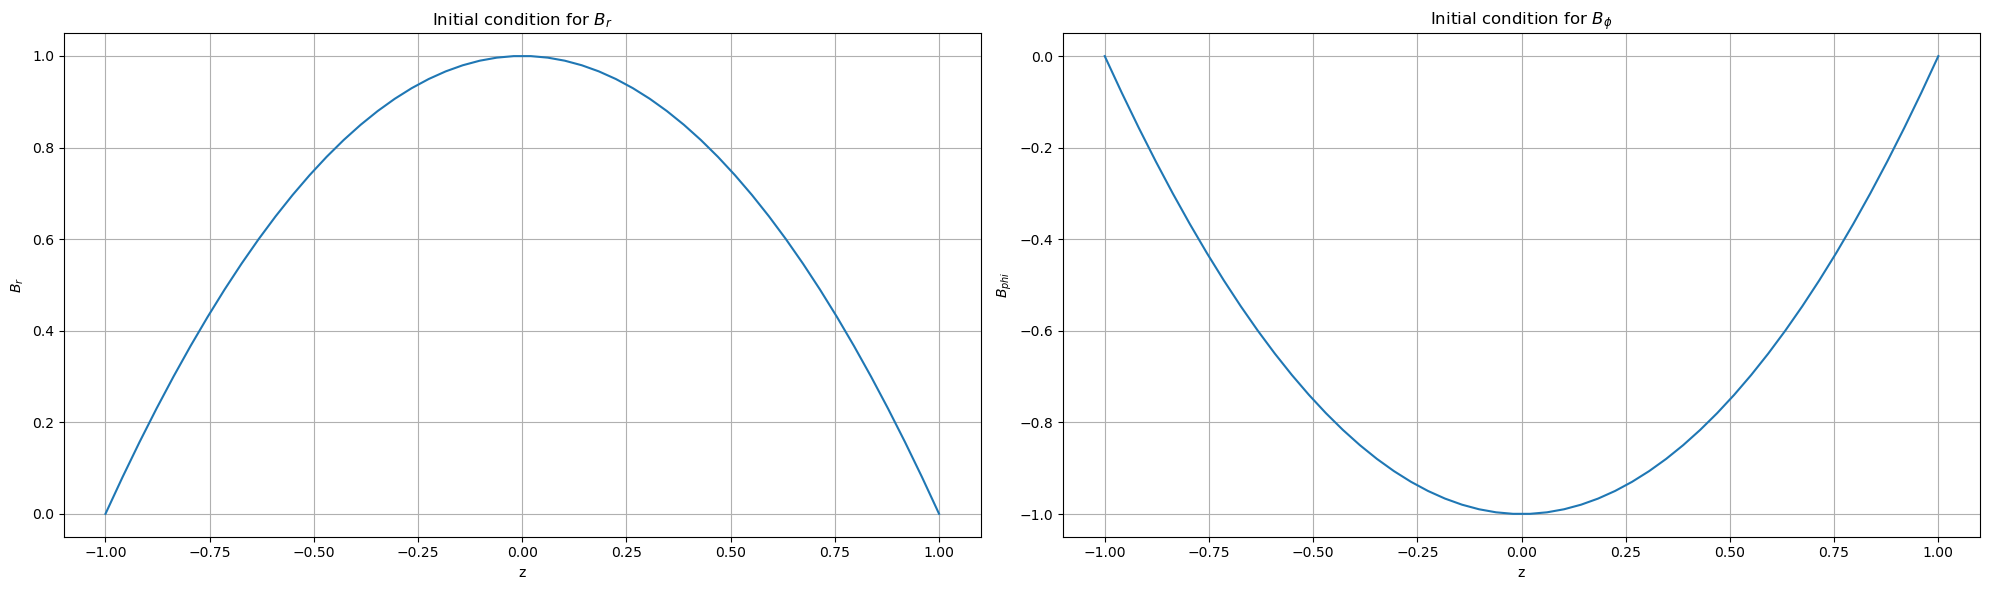

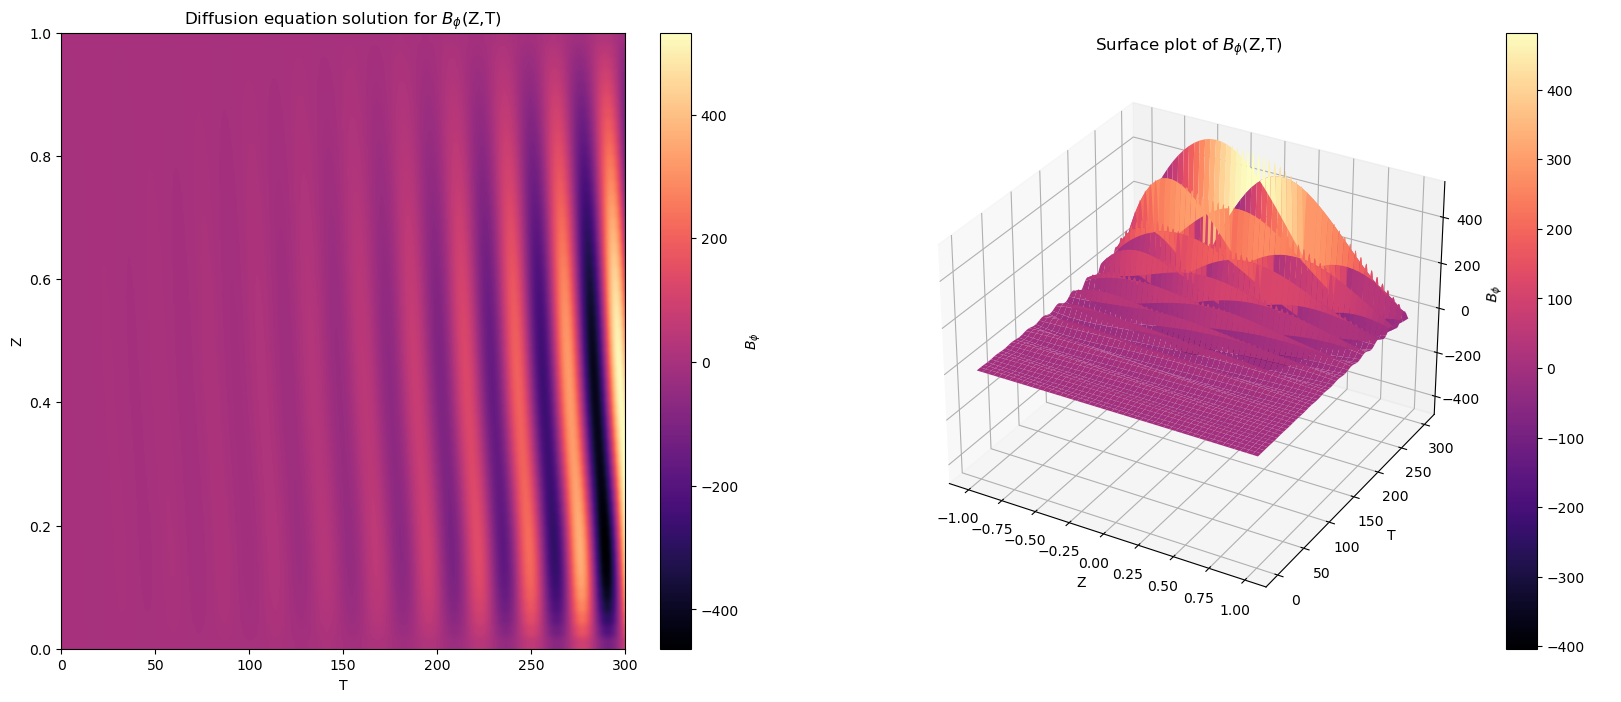

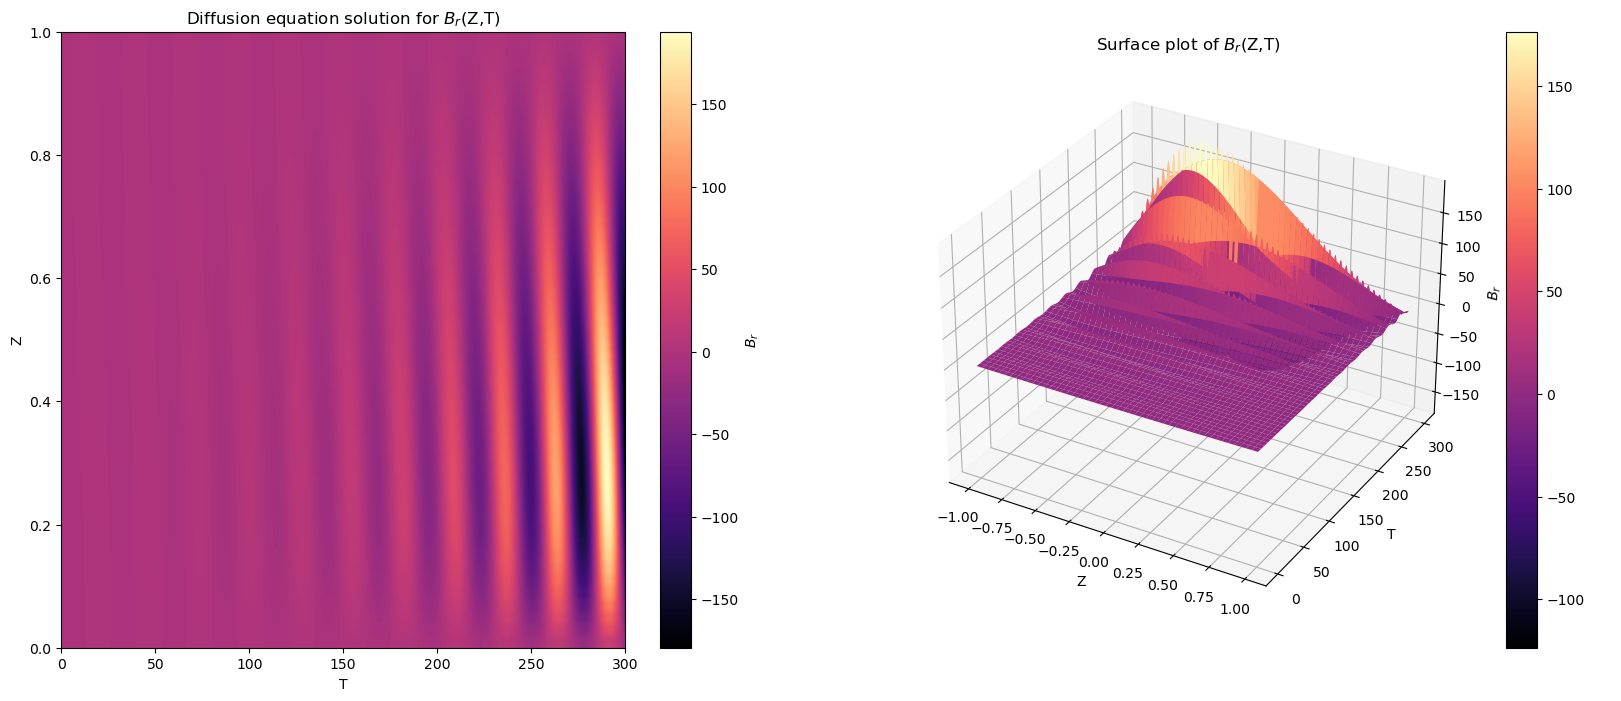

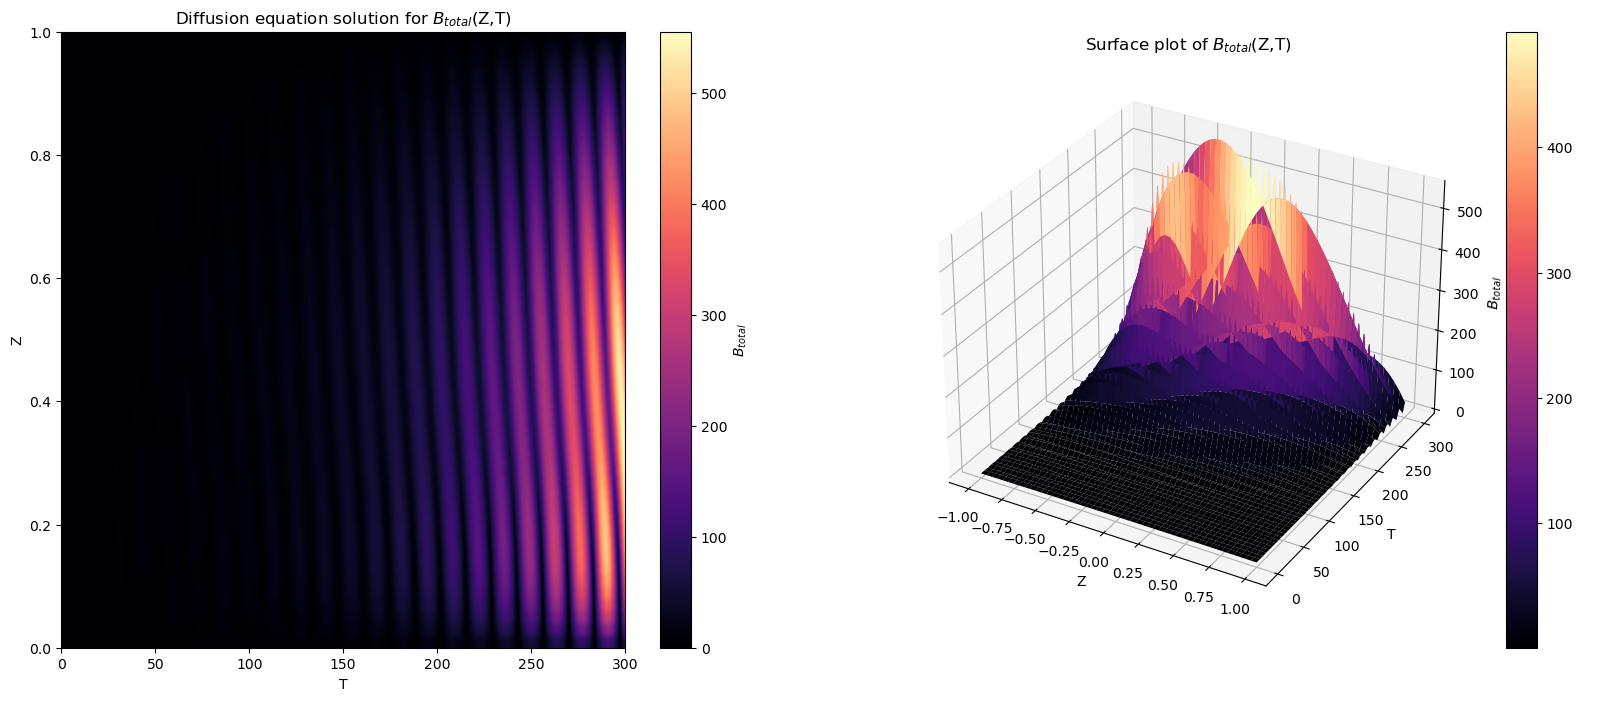

In [14]:
z = np.linspace(-L, L, M)
#print(z)
title_1 = 'Initial condition for $B_{r}$'
title_2 = 'Initial condition for $B_{\phi}$'

plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.plot(z, init_cond_Br(z))
plt.title(title_1)
plt.xlabel('z')
plt.ylabel('$B_{r}$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(z, init_cond_Bphi(z))
plt.title(title_2)
plt.xlabel('z')
plt.ylabel('$B_{phi}$')
plt.grid(True)

plt.tight_layout()
plt.show()


U, tspan, xspan = crank_nicolson_mod(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

U_r = U[:len(z), :]
U_phi = U[len(z):, :]

plot_B(U_r, tspan, xspan, T, L, '\phi')
plot_B(U_phi, tspan, xspan, T, L, 'r')
#plot_B_animation(U_phi, tspan, xspan, T, L, '{\phi}','2')
#plot_B_animation(U_r, tspan, xspan, T, L, 'r','2')

B_total = np.sqrt(U_phi**2 + U_r**2)
#print(B_total[:,0].shape)
plot_B(B_total, tspan, xspan, T, L, '{total}')
#plot_B_animation(B_total, tspan, xspan, T, L, '{total}','2')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


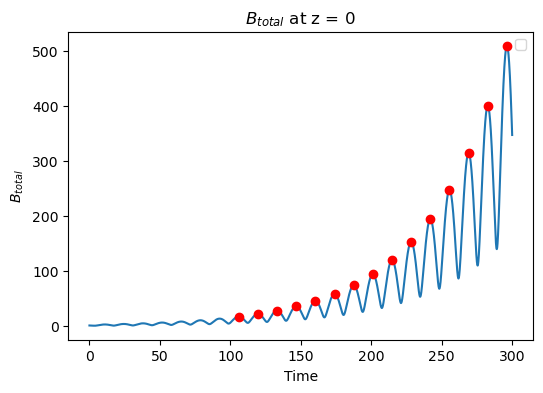

Growth rate: 1.768e-02
Dynamo number  -65.06983169023707


In [15]:
B_mid = B_total[int(M/2),:]

plt.figure(figsize=(6, 4))
plt.plot(tspan, B_mid)
x_max, y_max = find_local_maxima(tspan, B_mid)
plt.plot(x_max, y_max, 'ro')

# Add x and y labels
plt.xlabel('Time')
plt.ylabel('$B_{total}$')
plt.title('$B_{total}$ at z = 0')

# Show legend
plt.legend()

# Display the plot
plt.show()

decay_rate = get_decay_rate(tspan, B_mid)
print('Dynamo number ', -alpha*q*Omega*1**3/eta_T**2)

Calculating critical Dynamo number...


Critical Dynamo number Dc =  51.2659
Value of alpha at D_c = 55.1501 km/s


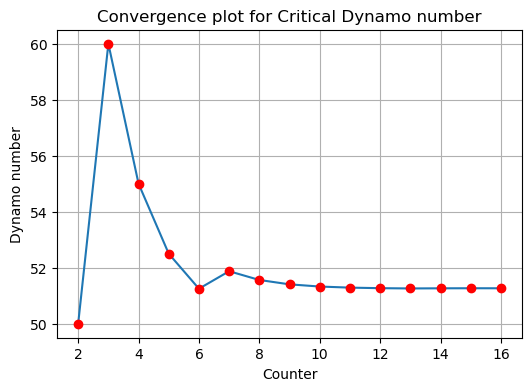

In [16]:
def f(D):
	alpha = D/(q*Omega*1**3/eta_T**2)
	z = np.linspace(-L, L, M)
	# Solve the diffusion equation in radial direction
	U, tspan, xspan = crank_nicolson_mod(init_cond_Br(z), init_cond_Bphi(z), M, N, T, L, eta_T, q, Omega, alpha)

	B_r = U[:len(z), :]
	B_phi = U[len(z):, :]

	B_total = np.sqrt(B_phi**2 + B_r**2)
	B_mid = B_total[int(M/2),:]

	decay_rate = get_decay_rate(tspan, B_mid, do_print=False)

	return decay_rate

print('Calculating critical Dynamo number...')
D_c, x_arr, y_arr = bisection(f, 30, 70)
print('Critical Dynamo number Dc = ', np.round(D_c, 4))
print('Value of alpha at D_c =', np.round(D_c/(q*Omega*1**3/eta_T**2)/(1e3*MYR/(100*PC)), 4), 'km/s')

plt.figure(figsize=(6, 4))
plt.plot(x_arr, y_arr)
plt.plot(x_arr, y_arr, 'ro')
plt.xlabel('Counter')
plt.ylabel('Dynamo number')
plt.title('Convergence plot for Critical Dynamo number')
plt.grid()

plt.show()